## Lecture Attendance Status Checker

### Development Envrionment

In [ ]:
%pip install dataframe-image
%pip install matplotlib-venn

In [1]:
import os
import math
import openpyxl
import pandas as pd
import numpy as np
import dataframe_image
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib_venn import  venn2, venn2_circles

### Font Instllation

In [2]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
with open(os.path.join('font_list.txt'), 'a', encoding="UTF-8") as fp:      
        fp.write("\n".join(font_list))

In [3]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumSquareOTF',
  'C:\\Users\\MinSeok\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquareR.otf'),
 ('NanumSquareOTF',
  'C:\\Users\\MinSeok\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquareEB.otf'),
 ('NanumMyeongjoOTF',
  'C:\\Users\\MinSeok\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumMyeongjo.otf'),
 ('NanumGothicOTF',
  'C:\\Users\\MinSeok\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.otf'),
 ('NanumSquareOTF',
  'C:\\Users\\MinSeok\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquareB.otf'),
 ('NanumBarunGothicOTF',
  'C:\\Users\\MinSeok\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.otf')]

In [4]:
plt.rcParams['font.family'] = 'NanumGothicOTF'

### Lecutre 1

In [5]:
lecture_01_df = pd.read_excel("강의1 출석부 명단.xlsx", engine='openpyxl')
pd.options.display.float_format = '{:,.0f}'.format

In [ ]:
lecture_01_perfect_attendance_df = lecture_01_df[((lecture_01_df['결석일수'].isna() == True)  & (lecture_01_df['지각횟수'].isna() == True))].copy()
lecture_01_perfect_attendance_df['출석일수(지각,조퇴포함)'] = lecture_01_perfect_attendance_df['출석일수(지각,조퇴포함)'] * 2
lecture_01_days_df = pd.DataFrame(lecture_01_perfect_attendance_df, columns = ['출석일수(지각,조퇴포함)'])
lecture_01_days_df= lecture_01_days_df.squeeze()
number_of_days = int(lecture_01_days_df.iloc[0])
lecture_01_perfect_attendance_df = lecture_01_perfect_attendance_df.reset_index() 
lecture_01_perfect_attendance_df.index = lecture_01_perfect_attendance_df.index + 1
del lecture_01_perfect_attendance_df['index']
lecture_01_perfect_attendance_df = lecture_01_perfect_attendance_df.fillna(0)
lecture_01_perfect_attendance_df[['학  번', '성 명', '결석일수', '지각횟수', '출석일수(지각,조퇴포함)']].head()

In [7]:
lecture_01_perfect_absent_df = lecture_01_df[((lecture_01_df['결석일수'] == number_of_days / 2) & (lecture_01_df['지각횟수'].isna() == True))].copy()
lecture_01_perfect_absent_df['결석일수'] = lecture_01_perfect_absent_df['결석일수'] * 2
lecture_01_perfect_absent_df = lecture_01_perfect_absent_df.reset_index() 
lecture_01_perfect_absent_df.index = lecture_01_perfect_absent_df.index + 1
del lecture_01_perfect_absent_df['index']
lecture_01_perfect_absent_df = lecture_01_perfect_absent_df.fillna(0)
lecture_01_perfect_absent_df = lecture_01_perfect_absent_df[['학  번', '성 명', '결석일수', '지각횟수', '출석일수(지각,조퇴포함)']]
dataframe_image.export(lecture_01_perfect_absent_df, 'lecture_01_perfect_absent_df.png', max_cols = -1, max_rows = -1)

In [8]:
lecture_01_only_absent_df = lecture_01_df[((lecture_01_df['결석일수'].isna() == False) & (lecture_01_df['지각횟수'].isna() == True))].copy()
lecture_01_only_absent_df['결석일수'] = lecture_01_only_absent_df['결석일수'] * 2
lecture_01_only_absent_df['출석일수(지각,조퇴포함)'] = lecture_01_only_absent_df['출석일수(지각,조퇴포함)'] * 2
lecture_01_only_absent_df['지각횟수)'] = lecture_01_only_absent_df['지각횟수'] * 2
lecture_01_only_absent_df = lecture_01_only_absent_df.astype({'결석일수': 'int'})

vacancy_index = ""
vacancy_list = []
num = 0
for i in lecture_01_perfect_absent_df['성 명']:
    num += 1
    if num == 1:
        vacancy_index = lecture_01_only_absent_df[lecture_01_only_absent_df['성 명'] == i].index
    else:
        vacancy_list.append(lecture_01_only_absent_df[lecture_01_only_absent_df['성 명'] == i].index[0])
if vacancy_index != "":
    vacancy_index = vacancy_index.union(vacancy_list)   
    lecture_01_only_absent_df = lecture_01_only_absent_df.drop(vacancy_index)

lecture_01_only_absent_df = lecture_01_only_absent_df.sort_values(['결석일수'], ascending=False)
lecture_01_only_absent_df = lecture_01_only_absent_df.reset_index() 
lecture_01_only_absent_df.index = lecture_01_only_absent_df.index + 1
del lecture_01_only_absent_df['index']
lecture_01_only_absent_df = lecture_01_only_absent_df.fillna(0)
lecture_01_only_absent_df = lecture_01_only_absent_df[['학  번', '성 명', '결석일수', '지각횟수', '출석일수(지각,조퇴포함)']]
dataframe_image.export(lecture_01_only_absent_df, 'lecture_01_only_absent_df.png', max_cols = -1, max_rows = -1)

In [9]:
lecture_01_only_tardy_df = lecture_01_df[((lecture_01_df['지각횟수'].isna() == False) &(lecture_01_df['결석일수'].isna() == True))].copy()
lecture_01_only_tardy_df['출석일수(지각,조퇴포함)'] = lecture_01_only_tardy_df['출석일수(지각,조퇴포함)'] * 2
lecture_01_only_tardy_df['지각횟수'] = lecture_01_only_tardy_df['지각횟수'] * 2
lecture_01_only_tardy_df = lecture_01_only_tardy_df.astype({'지각횟수': 'int'})
lecture_01_only_tardy_df  = lecture_01_only_tardy_df.sort_values(['지각횟수'], ascending=False)
lecture_01_only_tardy_df = lecture_01_only_tardy_df.reset_index() 
lecture_01_only_tardy_df.index = lecture_01_only_tardy_df.index + 1
del lecture_01_only_tardy_df['index']
lecture_01_only_tardy_df = lecture_01_only_tardy_df.fillna(0)
lecture_01_only_tardy_df = lecture_01_only_tardy_df[['학  번', '성 명', '결석일수', '지각횟수', '출석일수(지각,조퇴포함)']]
dataframe_image.export(lecture_01_only_tardy_df, 'lecture_01_only_tardy_df.png', max_cols = -1, max_rows = -1)

In [10]:
lecture_01_absent_tardy_df = lecture_01_df[((lecture_01_df['결석일수'].isna() == False) &(lecture_01_df['지각횟수'].isna() == False))].copy()
lecture_01_absent_tardy_df['결석일수'] = lecture_01_absent_tardy_df['결석일수'] * 2
lecture_01_absent_tardy_df['출석일수(지각,조퇴포함)'] = lecture_01_absent_tardy_df['출석일수(지각,조퇴포함)'] * 2
lecture_01_absent_tardy_df['지각횟수'] = lecture_01_absent_tardy_df['지각횟수'] * 2
lecture_01_absent_tardy_df = lecture_01_absent_tardy_df.astype({'지각횟수': 'int'})
lecture_01_absent_tardy_df = lecture_01_absent_tardy_df.sort_values(['지각횟수'], ascending=False)
lecture_01_absent_tardy_df = lecture_01_absent_tardy_df.reset_index() 
lecture_01_absent_tardy_df.index = lecture_01_absent_tardy_df.index + 1
del lecture_01_absent_tardy_df['index']
lecture_01_absent_tardy_df = lecture_01_absent_tardy_df.fillna(0)
lecture_01_absent_tardy_df = lecture_01_absent_tardy_df[['학  번', '성 명', '결석일수', '지각횟수', '출석일수(지각,조퇴포함)']]
dataframe_image.export(lecture_01_absent_tardy_df, 'lecture_01_absent_tardy_df.png', max_cols = -1, max_rows = -1)

In [ ]:
lecture_01_only_absent_plus_absent_tardy_df = pd.concat([lecture_01_only_absent_df, lecture_01_absent_tardy_df], axis=0)
lecture_01_only_absent_plus_absent_tardy_df = lecture_01_only_absent_plus_absent_tardy_df.sort_values(['결석일수'], ascending=False)
lecture_01_only_absent_plus_absent_tardy_df = lecture_01_only_absent_plus_absent_tardy_df.reset_index() 
del lecture_01_only_absent_plus_absent_tardy_df['index']
dataframe_image.export(lecture_01_only_absent_plus_absent_tardy_df, 'lecture_01_only_absent_plus_absent_tardy_df.png', max_cols = -1, max_rows = -1)
dataframe_image.export(lecture_01_only_absent_plus_absent_tardy_df[:15], 'lecture_01_only_absent_plus_absent_tardy_df_half_00.png', max_cols = -1, max_rows = -1)
dataframe_image.export(lecture_01_only_absent_plus_absent_tardy_df[15:], 'lecture_01_only_absent_plus_absent_tardy_df_half_01.png', max_cols = -1, max_rows = -1)

In [11]:
lecture_01_days_df = pd.DataFrame(lecture_01_perfect_attendance_df, columns = ['출석일수(지각,조퇴포함)'])
lecture_01_days_df= lecture_01_days_df.squeeze()
number_of_days = int(lecture_01_days_df.iloc[0])
print("The number of days: ", number_of_days)

number_of_students = len(lecture_01_df)
print("The number of students: ", number_of_students)

number_of_perfect_absent_students = len(lecture_01_perfect_absent_df)
print("The number of perfect absent students: ", number_of_perfect_absent_students)

number_of_real_students = len(lecture_01_df) - len(lecture_01_perfect_absent_df)
print("The number of real students: ", number_of_real_students)

number_of_perfect_attendance_students = len(lecture_01_perfect_attendance_df)
print("The number of perfect attendance students: ", number_of_perfect_attendance_students)

number_of_only_absent_students = len(lecture_01_only_absent_df)
print("The number of only absent students: ", number_of_only_absent_students)

number_of_only_tardy_students = len(lecture_01_only_tardy_df)
print("The number of only tardy students: ", number_of_only_tardy_students)

number_of_absent_tardy_students = len(lecture_01_absent_tardy_df)
print("The number of both absent and tardy students: ", number_of_absent_tardy_students)

The number of days:  17
The number of students:  46
The number of perfect absent students:  2
The number of real students:  44
The number of perfect attendance students:  27
The number of only absent students:  9
The number of only tardy students:  6
The number of both absent and tardy students:  2


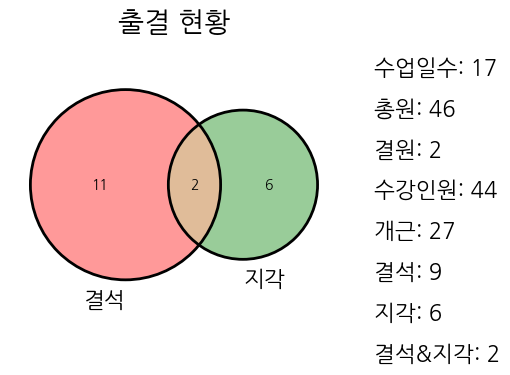

In [12]:
fig = plt.figure()
fig.set_size_inches(5,3)
A = set(lecture_01_df[(lecture_01_df['결석일수'].isna() == False)]['성 명'])
B = set(lecture_01_df[(lecture_01_df['지각횟수'].isna() == False)]['성 명'])
v = venn2(subsets=[A, B], set_labels=('결석', '지각', '개근'))
c = venn2_circles(subsets=[A, B], linestyle='solid')

plt.title("출결 현황\n", fontsize = 20)
for text in v.set_labels:
    text.set_fontsize(16)
plt.text(1.0, 0.54, '수업일수: ' + str(number_of_days), fontsize = 16)
plt.text(1.0, 0.34, '총원: ' + str(number_of_students), fontsize = 16)
plt.text(1.0, 0.14, '결원: ' + str(number_of_perfect_absent_students), fontsize = 16)
plt.text(1.0, -0.06, '수강인원: ' + str(number_of_real_students), fontsize = 16)
plt.text(1.0, -0.26, '개근: ' + str(number_of_perfect_attendance_students), fontsize = 16)
plt.text(1.0, -0.46, '결석: ' + str(number_of_only_absent_students), fontsize = 16)
plt.text(1.0, -0.66, '지각: ' + str(number_of_only_tardy_students), fontsize = 16)
plt.text(1.0, -0.86, '결석&지각: ' + str(number_of_absent_tardy_students), fontsize = 16)
plt.gca().set_facecolor("white")
plt.savefig('lecture_01_venn_diagram.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

### Lecutre 2

In [13]:
lecture_02_df = pd.read_excel("강의2 출석부 명단.xlsx", engine='openpyxl')
pd.options.display.float_format = '{:,.0f}'.format

In [ ]:
lecture_02_perfect_attendance_df = lecture_02_df[((lecture_02_df['결석일수'].isna() == True)  & (lecture_02_df['지각횟수'].isna() == True))].copy()
lecture_02_perfect_attendance_df['출석일수(지각,조퇴포함)'] = lecture_02_perfect_attendance_df['출석일수(지각,조퇴포함)'] * 2
lecture_02_days_df = pd.DataFrame(lecture_02_perfect_attendance_df, columns = ['출석일수(지각,조퇴포함)'])
lecture_02_days_df= lecture_02_days_df.squeeze()
number_of_days = int(lecture_02_days_df.iloc[0])
lecture_02_perfect_attendance_df = lecture_02_perfect_attendance_df.reset_index() 
lecture_02_perfect_attendance_df.index = lecture_02_perfect_attendance_df.index + 1
del lecture_02_perfect_attendance_df['index']
lecture_02_perfect_attendance_df = lecture_02_perfect_attendance_df.fillna(0)
lecture_02_perfect_attendance_df[['학  번', '성 명', '결석일수', '지각횟수', '출석일수(지각,조퇴포함)']].head()

In [15]:
lecture_02_perfect_absent_df = lecture_02_df[(lecture_02_df['결석일수'] == number_of_days / 2)].copy()
lecture_02_perfect_absent_df['결석일수'] = lecture_02_perfect_absent_df['결석일수'] * 2
lecture_02_perfect_absent_df = lecture_02_perfect_absent_df.reset_index() 
lecture_02_perfect_absent_df.index = lecture_02_perfect_absent_df.index + 1
del lecture_02_perfect_absent_df['index']
lecture_02_perfect_absent_df = lecture_02_perfect_absent_df.fillna(0)
lecture_02_perfect_absent_df = lecture_02_perfect_absent_df[['학  번', '성 명', '결석일수', '지각횟수', '출석일수(지각,조퇴포함)']]
dataframe_image.export(lecture_02_perfect_absent_df, 'lecture_02_perfect_absent_df.png', max_cols = -1, max_rows = -1)

In [16]:
lecture_02_only_absent_df = lecture_02_df[((lecture_02_df['결석일수'].isna() == False) & (lecture_02_df['지각횟수'].isna() == True))].copy()
lecture_02_only_absent_df['결석일수'] = lecture_02_only_absent_df['결석일수'] * 2
lecture_02_only_absent_df['출석일수(지각,조퇴포함)'] = lecture_02_only_absent_df['출석일수(지각,조퇴포함)'] * 2
lecture_02_only_absent_df['지각횟수)'] = lecture_02_only_absent_df['지각횟수'] * 2
lecture_02_only_absent_df = lecture_02_only_absent_df.astype({'결석일수': 'int'})

vacancy_index = ""
vacancy_list = []
num = 0
for i in lecture_02_perfect_absent_df['성 명']:
    num += 1
    if num == 1:
        vacancy_index = lecture_02_only_absent_df[lecture_02_only_absent_df['성 명'] == i].index
    else:
        vacancy_list.append(lecture_02_only_absent_df[lecture_02_only_absent_df['성 명'] == i].index[0])
if vacancy_index != "":
    vacancy_index = vacancy_index.union(vacancy_list)   
    lecture_02_only_absent_df = lecture_02_only_absent_df.drop(vacancy_index)

lecture_02_only_absent_df = lecture_02_only_absent_df.sort_values(['결석일수'], ascending=False)
lecture_02_only_absent_df = lecture_02_only_absent_df.reset_index() 
lecture_02_only_absent_df.index = lecture_02_only_absent_df.index + 1
del lecture_02_only_absent_df['index']
lecture_02_only_absent_df = lecture_02_only_absent_df.fillna(0)
lecture_02_only_absent_df = lecture_02_only_absent_df[['학  번', '성 명', '결석일수', '지각횟수', '출석일수(지각,조퇴포함)']]
dataframe_image.export(lecture_02_only_absent_df, 'lecture_02_only_absent_df.png', max_cols = -1, max_rows = -1)

In [17]:
lecture_02_only_tardy_df = lecture_02_df[((lecture_02_df['지각횟수'].isna() == False) &(lecture_02_df['결석일수'].isna() == True))].copy()
lecture_02_only_tardy_df['출석일수(지각,조퇴포함)'] = lecture_02_only_tardy_df['출석일수(지각,조퇴포함)'] * 2
lecture_02_only_tardy_df['지각횟수'] = lecture_02_only_tardy_df['지각횟수'] * 2
lecture_02_only_tardy_df = lecture_02_only_tardy_df.astype({'지각횟수': 'int'})
lecture_02_only_tardy_df  = lecture_02_only_tardy_df.sort_values(['지각횟수'], ascending=False)
lecture_02_only_tardy_df = lecture_02_only_tardy_df.reset_index() 
lecture_02_only_tardy_df.index = lecture_02_only_tardy_df.index + 1
del lecture_02_only_tardy_df['index']
lecture_02_only_tardy_df = lecture_02_only_tardy_df.fillna(0)
lecture_02_only_tardy_df = lecture_02_only_tardy_df[['학  번', '성 명', '결석일수', '지각횟수', '출석일수(지각,조퇴포함)']]
dataframe_image.export(lecture_02_only_tardy_df, 'lecture_02_only_tardy_df.png', max_cols = -1, max_rows = -1)

In [18]:
lecture_02_absent_tardy_df = lecture_02_df[((lecture_02_df['결석일수'].isna() == False) &(lecture_02_df['지각횟수'].isna() == False))].copy()
lecture_02_absent_tardy_df['결석일수'] = lecture_02_absent_tardy_df['결석일수'] * 2
lecture_02_absent_tardy_df['출석일수(지각,조퇴포함)'] = lecture_02_absent_tardy_df['출석일수(지각,조퇴포함)'] * 2
lecture_02_absent_tardy_df['지각횟수'] = lecture_02_absent_tardy_df['지각횟수'] * 2
lecture_02_absent_tardy_df = lecture_02_absent_tardy_df.astype({'지각횟수': 'int'})
lecture_02_absent_tardy_df = lecture_02_absent_tardy_df.sort_values(['지각횟수'], ascending=False)
lecture_02_absent_tardy_df = lecture_02_absent_tardy_df.reset_index() 
lecture_02_absent_tardy_df.index = lecture_02_absent_tardy_df.index + 1
del lecture_02_absent_tardy_df['index']
lecture_02_absent_tardy_df = lecture_02_absent_tardy_df.fillna(0)
lecture_02_absent_tardy_df = lecture_02_absent_tardy_df[['학  번', '성 명', '결석일수', '출석일수(지각,조퇴포함)', '지각횟수']]
dataframe_image.export(lecture_02_absent_tardy_df, 'lecture_02_absent_tardy_df.png', max_cols = -1, max_rows = -1)

In [ ]:
lecture_02_only_absent_plus_absent_tardy_df = pd.concat([lecture_02_only_absent_df, lecture_02_absent_tardy_df], axis=0)
lecture_02_only_absent_plus_absent_tardy_df = lecture_02_only_absent_plus_absent_tardy_df.sort_values(['결석일수'], ascending=False)
lecture_02_only_absent_plus_absent_tardy_df = lecture_02_only_absent_plus_absent_tardy_df.reset_index() 
del lecture_02_only_absent_plus_absent_tardy_df['index']
dataframe_image.export(lecture_02_only_absent_plus_absent_tardy_df, 'lecture_02_only_absent_plus_absent_tardy_df.png', max_cols = -1, max_rows = -1)
dataframe_image.export(lecture_02_only_absent_plus_absent_tardy_df[:15], 'lecture_02_only_absent_plus_absent_tardy_df_half_00.png', max_cols = -1, max_rows = -1)
dataframe_image.export(lecture_02_only_absent_plus_absent_tardy_df[15:], 'lecture_02_only_absent_plus_absent_tardy_df_half_02.png', max_cols = -1, max_rows = -1)

In [20]:
lecture_02_days_df = pd.DataFrame(lecture_02_perfect_attendance_df, columns = ['출석일수(지각,조퇴포함)'])
lecture_02_days_df= lecture_02_days_df.squeeze()
number_of_days = int(lecture_02_days_df.iloc[0])
print("The number of days: ", number_of_days)

number_of_students = len(lecture_02_df)
print("The number of students: ", number_of_students)

number_of_perfect_absent_students = len(lecture_02_perfect_absent_df)
print("The number of perfect absent students: ", number_of_perfect_absent_students)

number_of_real_students = len(lecture_02_df) - len(lecture_02_perfect_absent_df)
print("The number of real students: ", number_of_real_students)

number_of_perfect_attendance_students = len(lecture_02_perfect_attendance_df)
print("The number of perfect attendance students: ", number_of_perfect_attendance_students)

number_of_only_absent_students = len(lecture_02_only_absent_df)
print("The number of only absent students: ", number_of_only_absent_students)

number_of_only_tardy_students = len(lecture_02_only_tardy_df)
print("The number of only tardy students: ", number_of_only_tardy_students)

number_of_absent_tardy_students = len(lecture_02_absent_tardy_df)
print("The number of both absent and tardy students: ", number_of_absent_tardy_students)

The number of days:  17
The number of students:  6
The number of perfect absent students:  0
The number of real students:  6
The number of perfect attendance students:  3
The number of only absent students:  3
The number of only tardy students:  0
The number of both absent and tardy students:  0


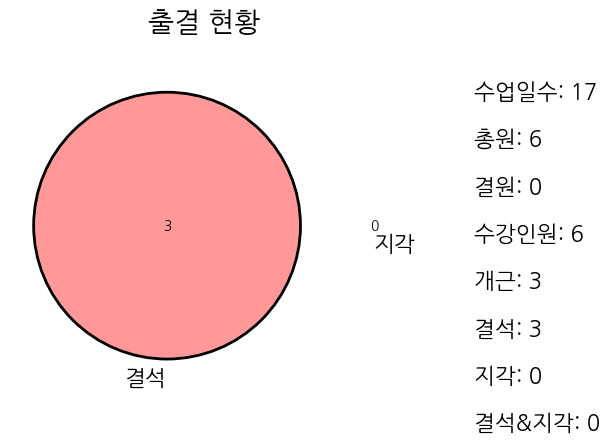

In [21]:
fig = plt.figure()
fig.set_size_inches(5,7)
A = set(lecture_02_df[(lecture_02_df['결석일수'].isna() == False)]['성 명'])
B = set(lecture_02_df[(lecture_02_df['지각횟수'].isna() == False)]['성 명'])
v = venn2(subsets=[A, B], set_labels=('결석', '지각', '개근'))
c = venn2_circles(subsets=[A, B], linestyle='solid')

plt.title("출결 현황\n", fontsize = 20)
for text in v.set_labels:
    text.set_fontsize(16)
plt.text(1.3, 0.54, '수업일수: ' + str(number_of_days), fontsize = 16)
plt.text(1.3, 0.34, '총원: ' + str(number_of_students), fontsize = 16)
plt.text(1.3, 0.14, '결원: ' + str(number_of_perfect_absent_students), fontsize = 16)
plt.text(1.3, -0.06, '수강인원: ' + str(number_of_real_students), fontsize = 16)
plt.text(1.3, -0.26, '개근: ' + str(number_of_perfect_attendance_students), fontsize = 16)
plt.text(1.3, -0.46, '결석: ' + str(number_of_only_absent_students), fontsize = 16)
plt.text(1.3, -0.66, '지각: ' + str(number_of_only_tardy_students), fontsize = 16)
plt.text(1.3, -0.86, '결석&지각: ' + str(number_of_absent_tardy_students), fontsize = 16)
plt.gca().set_facecolor("white")
plt.savefig('lecture_02_venn_diagram.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()